In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [221]:
im_width = 1024
data = np.zeros( shape = (im_width, im_width) )
for i in range(im_width):
    for j in range(im_width):
        data[i,j] += np.exp( -( np.sqrt( (i-im_width/4)**2 + (j-im_width/2)**2) / 50)**2 )
        data[i,j] += 0.02 * np.exp( -( np.sqrt( (i- 2*im_width/4)**2 + (j-im_width/2)**2) / 50)**2 )
        data[i,j] += 0.02**2 * np.exp( -( np.sqrt( (i- 3*im_width/4)**2 + (j-im_width/2)**2) / 50)**2 )

In [222]:
def bit_depth(data, n):
    d = np.round(data*2**n)
    plt.figure()

    def easylog(x):
        if x>0:
            return np.log(x)
        else:
            return 0

    v = np.vectorize(easylog)
    
    f, axarr = plt.subplots(nrows = 1, ncols = 3, figsize = (10,3))


    axarr[0].imshow( (d).T, cmap = 'gray')
    axarr[0].set_title('Intensity Image')
    
    
    axarr[1].imshow( v(d).T, cmap = 'gray')
    axarr[1].set_title('Log(Intensity) Image')

    
    
    d_sub = d[:,int(im_width/2)]
    axarr[2].set_title('X Cross Section')
    axarr[2].plot(d_sub)
    axarr[2].set_ylim([0,max(d_sub[int(2*im_width/3):]*1.1)])
    
    for i in range(len(axarr)):
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])

    f.suptitle(str(n) + '-Bit Image Simulation', y = 1.05, fontsize = 16)
    
    plt.subplots_adjust(wspace = 0.05)
    
    plt.show()


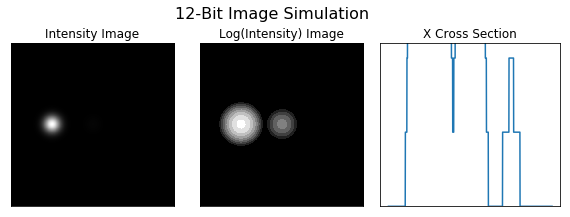

In [223]:
bit_depth(data, 12)

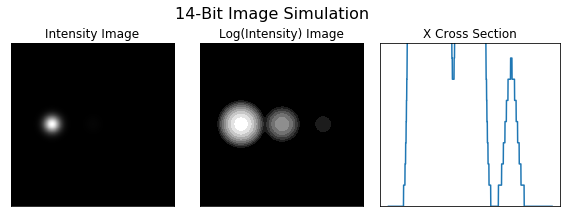

In [224]:
bit_depth(data, 14)

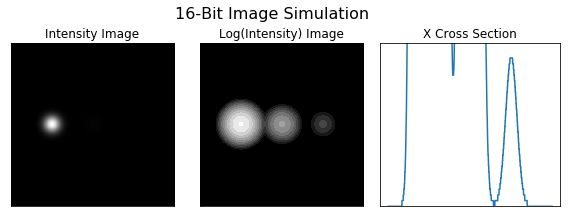

In [225]:
bit_depth(data, 16)